### Outliers

An outlier is an obsevation which derivates so much from the other observatios

It can occur because of variability in measurement and due to misinterpretation in filling data points.

In some case it can occur due to occur some suspicious activites

Example: credict card Fraud Detection

### Outlier Detection

There are various methods are available for handling Outliers.some of them are 

a) Hypothesis Testing

b) Z-score method

c) Robust Z-score

d) I.Q.R method

e) Winsorization method (Percentile Capping)

f) DBSCAN Clustering

g) Isolation Forest

h) Linear Regression Models (PCA, LMS)

i) Standard Deviation

j) Percentile

k) Visualizing the data

### Outliers

(1)Univariate Outliers

(2)Multivariate Outliers


### 1.Univariate Outliers
This method looks for data points with extreme values on one variable.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from sklearn.datasets import load_iris

from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("titanic_data.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.shape

(891, 12)

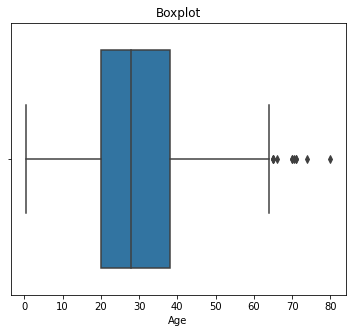

In [7]:
def Box_plots(data):
    plt.figure(figsize=(6,5))
    plt.title("Boxplot")
    sns.boxplot(data)
    plt.show()
Box_plots(data["Age"])

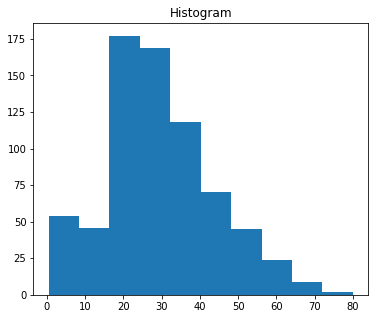

In [8]:
def hist_plots(data):
    plt.figure(figsize=(6,5))
    plt.title("Histogram")
    plt.hist(data)
    plt.show()
hist_plots(data["Age"])

<Figure size 576x288 with 0 Axes>

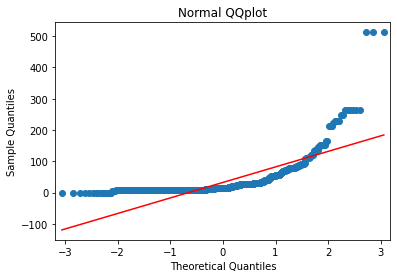

In [9]:
def qq_plots(data):
    plt.figure(figsize = (8,4))
    qqplot(data,line='s')
    plt.title("Normal QQplot")
    plt.show()
qq_plots(data["Fare"])

In [10]:
def dist_plots(data):
    plt.figure

### Multivariate Outliers

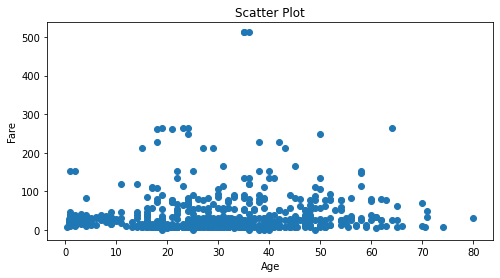

In [11]:
def scatter_plots(df1,df2):
    fig,ax = plt.subplots(figsize = (8,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Age')
    ax.set_ylabel('Fare')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(data["Age"],data["Fare"])

### 1.Deleting observations

Sometimes it’s best to completely remove those records from your dataset to stop them from skewing your analysis. We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers.

### 1.Deleting Outliers Using IQR

In [12]:
#Removing Outliers in Age
data_cop = data.copy()
Q1=data_cop['Age'].quantile(0.25)
Q3=data_cop['Age'].quantile(0.75)
IQR=Q3-Q1
data_cop=data_cop[~((data['Age']<(Q1-1.5*IQR))|(data['Age']>(Q3+1.5*IQR)))]

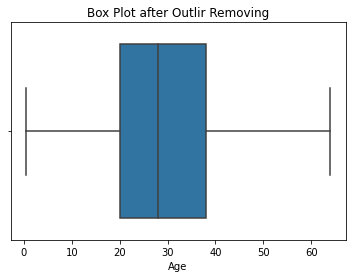

In [13]:
sns.boxplot(data_cop["Age"])
plt.title("Box Plot after Outlir Removing")
plt.show()